<a href="https://colab.research.google.com/github/Maheshcheegiti/FML/blob/main/Univariate_Regression_on_50_Startups_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
startup = pd.read_csv("/content/drive/MyDrive/startup/50_Startups.csv")

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [6]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

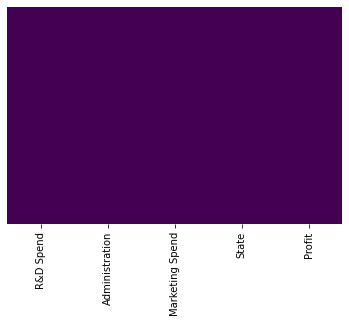

In [10]:
sns.heatmap(startup.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [12]:
startup.shape

(50, 5)

In [13]:
startup.drop_duplicates(keep="first",inplace= True)

In [15]:
# checking the shape of data after removing duplicates
startup.shape

(50, 5)

In [16]:
X = startup["R&D Spend"].values
y = startup["Profit"].values

In [17]:
X.shape, y.shape

((50,), (50,))

In [18]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((50, 1), (50, 1))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10,random_state=101)

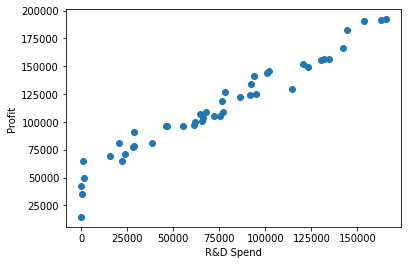

In [23]:
plt.scatter(X_train, y_train)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

###Training

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 6931.014150295963
MSE : 84514352.6055548
RMSE : 9193.16880110198
R2_SCORE : 0.9515341135379992


###Testing

In [26]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 7410.959687620128
MSE : 96298137.84477428
RMSE : 9813.161460241765
R2_SCORE : 0.545275548453303


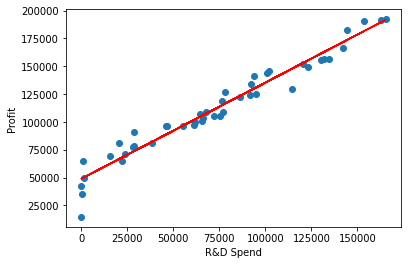

In [29]:
plt.scatter(X_train, y_train)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.plot(X_train,y_predict, color ='red')
plt.show()